## Small Image Classification Using Convolutional Neural Network (CNN)

#### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

Saving small_images.jpg to small_images (1).jpg


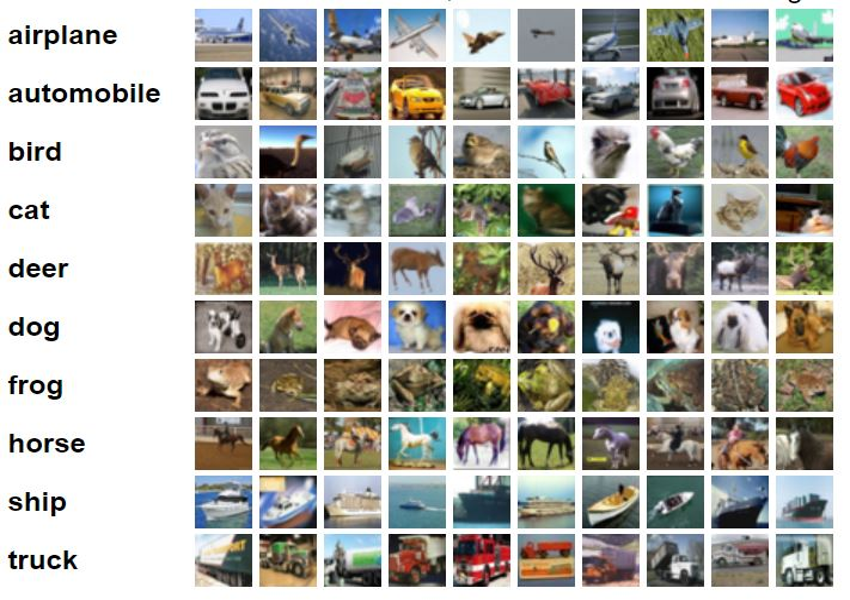

In [16]:
from google.colab import files
from PIL import Image
import io
from IPython.display import display

uploaded = files.upload()

for filename in uploaded.keys():

    image = Image.open(io.BytesIO(uploaded[filename]))

    image_resized = image.resize((850, 600))

    display(image_resized)


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

##### Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

##### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### Let's plot some images to see what they are

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

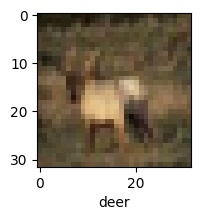

In [11]:
plot_sample(X_train, y_train, 3)

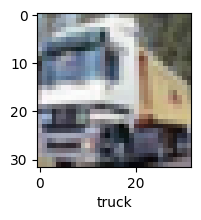

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.3015 - loss: 1.9342
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 102ms/step - accuracy: 0.4171 - loss: 1.6531
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 82ms/step - accuracy: 0.4541 - loss: 1.5448
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - accuracy: 0.4751 - loss: 1.4949
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 84ms/step - accuracy: 0.4925 - loss: 1.4469


### You can see that at the end of 5 epochs, accuracy is at around 48.48%

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.31      0.44      1000
           1       0.69      0.47      0.56      1000
           2       0.36      0.34      0.35      1000
           3       0.39      0.24      0.29      1000
           4       0.46      0.33      0.38      1000
           5       0.42      0.36      0.39      1000
           6       0.49      0.58      0.53      1000
           7       0.32      0.75      0.45      1000
           8       0.73      0.49      0.59      1000
           9       0.43      0.70      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



### Now let us build a convolutional neural network to train our images

In [17]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,230,012 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3847 - loss: 1.6857
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6115 - loss: 1.1152
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.6651 - loss: 0.9663
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.6954 - loss: 0.8659
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7250 - loss: 0.7861
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7455 - loss: 0.7296
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.7658 - loss: 0.6736
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.7836 - loss: 0.6197
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7993 - loss: 0.5809
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.8132 - loss: 0.5397


### With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7055 - loss: 0.9235


[0.934004008769989, 0.7038000226020813]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


array([[4.91045421e-06, 6.53622646e-06, 2.23337347e-03, 9.67276394e-01,
        1.74257744e-04, 2.63575558e-02, 3.90458247e-03, 2.18946616e-06,
        3.74618139e-05, 2.63046559e-06],
       [2.12426836e-04, 1.40117984e-02, 3.81032699e-08, 1.64222200e-07,
        3.46750095e-09, 1.25352917e-09, 3.99087119e-09, 3.48158391e-09,
        9.84410107e-01, 1.36547443e-03],
       [1.37967616e-01, 1.21752163e-02, 1.97418500e-03, 1.22128716e-02,
        2.38749431e-03, 1.35719462e-03, 2.16418644e-03, 6.05932262e-04,
        7.98668206e-01, 3.04870214e-02],
       [9.68936503e-01, 1.79749186e-04, 1.64372548e-02, 3.08852317e-03,
        5.17974654e-03, 6.09237286e-05, 8.80052758e-05, 3.45744163e-04,
        5.62724750e-03, 5.62769274e-05],
       [3.94194018e-07, 2.44741768e-05, 8.03992525e-03, 5.60611933e-02,
        8.29310000e-01, 5.58502856e-04, 1.05968036e-01, 6.65247580e-06,
        2.12098821e-05, 9.59162298e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

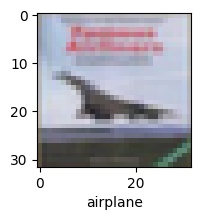

In [25]:
plot_sample(X_test, y_test,3)

In [26]:
classes[y_classes[3]]

'airplane'

In [27]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

# CNN MODEL

Saving CNN.jpg to CNN.jpg


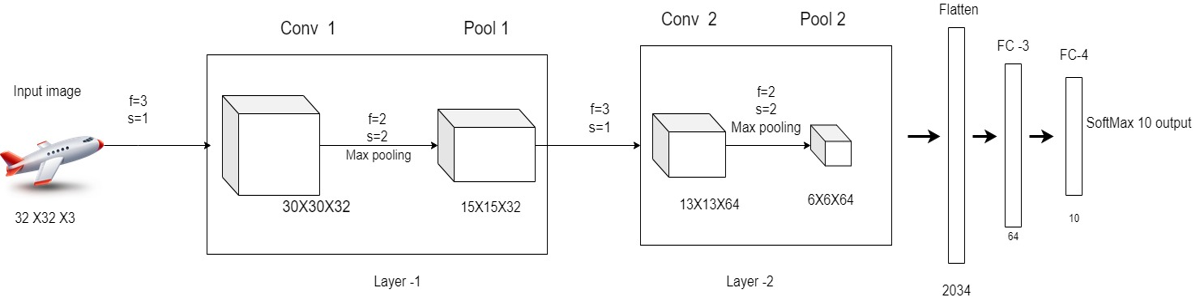

In [28]:
uploaded = files.upload()

for filename in uploaded.keys():

    image = Image.open(io.BytesIO(uploaded[filename]))

    image_resized = image.resize((1200, 300))

    display(image_resized)


### The formula for calculating a dimension of the output of conv layer is
## ((n+2p-f)/s)+1